# Multivariate Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import math
import pylab
import pickle

from scipy import stats

from statsmodels.stats import diagnostic as diag
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Load and clean the data

In [2]:
# Function that prints vertical separator.
def vertsep():
    print("-"*60)

data_path = "C:\\Users\\mlalonde\\Downloads\\korea_data.xlsx"

# Read in the data.
econ_df = pd.read_excel(data_path)

# Replace missing values with nan - for demonstration, will drop.
econ_df = econ_df.replace('..', 'nan')
econ_df = econ_df.set_index('Year')
display(econ_df.head())

vertsep()

# Set data type and select rows up to 2016.
econ_df = econ_df.astype(float)
econ_df = econ_df.loc['1969':'2016']

# Rename columns.
column_names = {'Unemployment, total (% of total labor force) (national estimate)':'unemployment',
                'GDP growth (annual %)': 'gdp_growth',
                'Gross capital formation (% of GDP)':'gross_capital_formation',
                'Population growth (annual %)':'pop_growth', 
                'Birth rate, crude (per 1,000 people)':'birth_rate',
                'Broad money growth (annual %)':'broad_money_growth',                
                'Final consumption expenditure (% of GDP)':'final_consum_gdp',
                'Final consumption expenditure (annual % growth)':'final_consum_growth',
                'General government final consumption expenditure (annual % growth)':'gov_final_consum_growth',
                'Gross capital formation (annual % growth)':'gross_cap_form_growth',
                'Households and NPISHs Final consumption expenditure (annual % growth)':'hh_consum_growth'}
econ_df = econ_df.rename(columns=column_names)

# Check for nulls.
display(econ_df.isnull().any())
vertsep()
econ_df.head()

,GDP growth (annual %),Gross capital formation (% of GDP),Population growth (annual %),"Birth rate, crude (per 1,000 people)",Broad money growth (annual %),Final consumption expenditure (annual % growth),General government final consumption expenditure (annual % growth),Gross capital formation (annual % growth),Households and NPISHs Final consumption expenditure (annual % growth),"Unemployment, total (% of total labor force) (national estimate)"
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.2,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.2,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.4,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.3,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


------------------------------------------------------------


gdp_growth                 False
gross_capital_formation    False
pop_growth                 False
birth_rate                 False
broad_money_growth         False
final_consum_growth        False
gov_final_consum_growth    False
gross_cap_form_growth      False
hh_consum_growth           False
unemployment               False
dtype: bool

------------------------------------------------------------


,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
Year,,,,,,,,,,
1969,14.541235,29.943577,2.263434,30.663,60.984733,10.693249,10.640799,29.908118,10.700325,4.86
1970,9.997407,26.338200,2.184174,31.200,27.422864,10.161539,7.279573,0.058667,10.557300,4.51
1971,10.454693,25.558501,1.971324,31.200,20.844481,9.330434,8.610547,15.172870,9.426969,4.57
1972,7.150715,21.404761,1.875999,28.400,33.815028,5.788458,8.134824,-13.056701,5.471355,4.59
1973,14.827554,25.872858,1.768293,28.300,36.415629,8.089952,2.287729,32.098276,8.927295,4.04


## Check for multicolinearity.

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
gdp_growth,1.000000,0.086712,0.567216,0.553225,0.335249,0.855835,0.098183,0.825496,0.868848,-0.160783
gross_capital_formation,0.086712,1.000000,-0.215243,-0.241668,-0.163803,0.266617,0.118075,0.187885,0.268592,-0.618524
pop_growth,0.567216,-0.215243,1.000000,0.978754,0.548336,0.470449,0.357042,0.317556,0.442187,0.279486
birth_rate,0.553225,-0.241668,0.978754,1.000000,0.530563,0.458319,0.370517,0.305254,0.428266,0.313783
broad_money_growth,0.335249,-0.163803,0.548336,0.530563,1.000000,0.290507,0.287270,0.235561,0.267220,0.336335
final_consum_growth,0.855835,0.266617,0.470449,0.458319,0.290507,1.000000,0.323250,0.700392,0.993526,-0.299310
gov_final_consum_growth,0.098183,0.118075,0.357042,0.370517,0.287270,0.323250,1.000000,0.033376,0.216641,0.007940
gross_cap_form_growth,0.825496,0.187885,0.317556,0.305254,0.235561,0.700392,0.033376,1.000000,0.715021,-0.207261
hh_consum_growth,0.868848,0.268592,0.442187,0.428266,0.267220,0.993526,0.216641,0.715021,1.000000,-0.304797
unemployment,-0.160783,-0.618524,0.279486,0.313783,0.336335,-0.299310,0.007940,-0.207261,-0.304797,1.000000


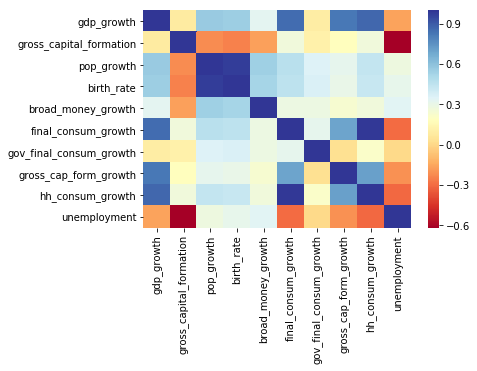

In [3]:
# Calculate the correlatoin matrix.
corr = econ_df.corr()

# Display the correlation matrix.
display(corr)

# Plot the correlation heatmap.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlBu')

In [4]:
# From the graph above, it looks like we can drop:
#    birth_rate OR pop_growth
#    final_consum_growth OR hh_consum_growth
#    gross_capital_formation OR unemployment

# Note: Think up a programmatic way to choose which series of a correlated pair should be dropped.
#    Maybe the one more highly correlated with the dependent variable should be kept?

In [5]:
# Define the 'before' dataframe.
econ_df_before = econ_df

# Add a constant term to the data.
x1 = sm.tools.add_constant(econ_df_before)

# Create a series with VIF values.
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index = x1.columns)

# Display the VIF values.
print('DATA BEFORE')
vertsep()
display(series_before)

DATA BEFORE
------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                       314.550195
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174368
broad_money_growth            1.633079
final_consum_growth        2305.724583
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093634
unemployment                  2.800008
dtype: float64

In [6]:
# Define the 'after' dataframe.
econ_df_after = econ_df.drop(['gdp_growth','birth_rate','final_consum_growth','gross_capital_formation'], axis=1)

# Add a constant term to the data.
x2 = sm.tools.add_constant(econ_df_after)

# Create a series with VIF values.
series_after = pd.Series([variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])], index=x2.columns)

# Display the VIF values after omitting correlated series.
print('DATA AFTER')
vertsep()
display(series_after)

DATA AFTER
------------------------------------------------------------


const                      27.891150
pop_growth                  1.971299
broad_money_growth          1.604644
gov_final_consum_growth     1.232229
gross_cap_form_growth       2.142992
hh_consum_growth            2.782698
unemployment                1.588410
dtype: float64

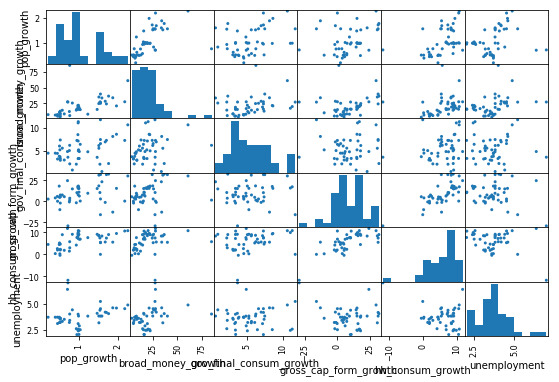

In [7]:
# Display the data in a scatter matrix.
pd.plotting.scatter_matrix(econ_df_after, alpha=1, figsize=(9,6))
plt.show()

## Describe the data set.

In [8]:
# Get a data summary.
desc_df = econ_df.describe()

# Add +/- 3x standard deviation metric.
desc_df.loc['+3_stdev'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_stdev'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,gdp_growth,gross_capital_formation,pop_growth,birth_rate,broad_money_growth,final_consum_growth,gov_final_consum_growth,gross_cap_form_growth,hh_consum_growth,unemployment
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.280315,32.433236,1.058072,16.340896,20.426621,5.820239,5.419214,8.965681,5.879176,3.678096
std,4.209306,4.136932,0.514039,6.814683,14.748442,3.627444,2.622254,12.629912,4.227720,0.968616
min,-5.471219,21.404761,0.211998,7.900000,2.980690,-9.288825,0.560957,-29.403255,-11.894309,2.048000
25%,4.374899,29.776910,0.615602,9.950000,10.586461,3.591334,3.384407,2.114078,3.825773,3.150475
50%,7.513471,32.335229,0.985132,15.150000,17.807598,6.531163,5.056509,7.431966,6.999971,3.700000
75%,10.376191,34.474874,1.525765,21.750000,26.923837,8.179037,7.188470,16.210283,8.938837,4.088500
max,14.827554,41.374062,2.263434,31.200000,85.203081,10.834413,11.742807,32.098276,11.711835,6.963000
+3_stdev,19.908232,44.844034,2.600188,36.784945,64.671947,16.702571,13.285976,46.855416,18.562336,6.583944
-3_stdev,-5.347602,20.022439,-0.484044,-4.103153,-23.818705,-5.062092,-2.447547,-28.924054,-6.803985,0.772247


In [9]:
# Filter the data to remove values outside mean+/-3*stdevs.
econ_remove_df = econ_df[(np.abs(stats.zscore(econ_df)) < 3).all(axis=1)]

# Look at what rows were removed.
econ_df.index.difference(econ_remove_df.index)

Int64Index([1998, 2001], dtype='int64', name='Year')

## Build the Model

In [10]:
# Define input (x) and output variable.
econ_df_after = econ_df.drop(['birth_rate', 'final_consum_growth', 'gross_capital_formation'], axis=1)

x = econ_df_after.drop('gdp_growth', axis=1)
y = econ_df_after[['gdp_growth']]

# Split x and y into training and test data sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create a linear regression model, pass in data.
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Look at the fitted model.

In [11]:
# Get the intercept and coefficient.
print("Model intercept: {:.4}".format(regression_model.intercept_[0]))
# print("Model coefficients: ", regression_model.coef_[0])
vertsep()

# Print coefficients.
for metric, coef in zip(x.columns, regression_model.coef_[0]):
    print("Coefficient for {}: {:.2}".format(metric, coef))

Model intercept: 2.08
------------------------------------------------------------
Coefficient for pop_growth: 2.0
Coefficient for broad_money_growth: -0.0017
Coefficient for gov_final_consum_growth: -0.21
Coefficient for gross_cap_form_growth: 0.14
Coefficient for hh_consum_growth: 0.51
Coefficient for unemployment: 0.027


In [12]:
# In the above, the model intercept is the value of y when all other variables
#    are zero.
# Coefficients can be thought of as how many units y changes with each unit
#    change in that variable.

In [13]:
# Get multiple predictions.
y_predict = regression_model.predict(x_test)

# Compare prediction to actual.
print(y_predict)
vertsep()
display(y_test)

[[ 7.61317534]
 [ 6.31344066]
 [ 5.06818662]
 [ 4.19869856]
 [11.11885324]
 [ 5.13377964]
 [10.22772664]
 [10.2048022 ]
 [ 3.30365173]
 [ 7.69074121]]
------------------------------------------------------------


,gdp_growth
Year,
2002,7.432434
1992,6.175506
2007,5.463396
2005,3.923677
1971,10.454693
1972,7.150715
2000,8.924426
1995,9.570604
2013,2.896205


In [14]:
# The prediction isn't bad.

## Evaluating the Model

In [15]:
# Using Statsmodel
# Define the input.
x2 = sm.add_constant(x)

# Create OLS model.
model = sm.OLS(y, x2)

# Fit model to the data.
est = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Check for heteroscedasticity.

In [16]:
def report_test_result(test_name, p_value):
    msg = ('', '')
    if p_value > 0.05:
        msg = ('not', 'not ')
    print('\n')
    print(f'{test_name} Test Result')
    vertsep()
    print('p-value: {:.4}'.format(p_value))
    print(f'heteroscedasticity was {msg[1]}detected')
    print(f'we can{msg[0]} reject the null hypothesis')

# Run the White test.
_, pval, _, f_pval = diag.het_white(est.resid, est.model.exog, retres=False)
vertsep()
report_test_result("White", pval)

# Run the Breusch-Pagan test.
_, pval, _, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
vertsep()
report_test_result("Breusch-Pagan", pval)

------------------------------------------------------------


White Test Result
------------------------------------------------------------
p-value: 0.4337
heteroscedasticity was not detected
we cannot reject the null hypothesis
------------------------------------------------------------


Breusch-Pagan Test Result
------------------------------------------------------------
p-value: 0.2518
heteroscedasticity was not detected
we cannot reject the null hypothesis


### Check for autocorrelation.

In [17]:
# Calculate lag.
lag = min(10, (len(x)//5))